# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/AssignmentsIPCV/dataset.zip ./
!unzip dataset.zip

Mounted at /content/drive
Archive:  dataset.zip
   creating: dataset/
  inflating: __MACOSX/._dataset      
   creating: dataset/scenes/
  inflating: __MACOSX/dataset/._scenes  
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
   creating: dataset/models/
  inflating: __MACOSX/dataset/._models  
  inflating: dataset/scenes/scene12.png  
  inflating: __MACOSX/dataset/scenes/._scene12.png  
  inflating: dataset/scenes/scene10.png  
  inflating: __MACOSX/dataset/scenes/._scene10.png  
  inflating: dataset/scenes/scene11.png  
  inflating: __MACOSX/dataset/scenes/._scene11.png  
  inflating: dataset/scenes/scene5.png  
  inflating: __MACOSX/dataset/scenes/._scene5.png  
  inflating: dataset/scenes/scene4.png  
  inflating: __MACOSX/dataset/scenes/._scene4.png  
  inflating: dataset/scenes/scene6.png  
  inflating: __MACOSX/dataset/scenes/._scene6.png  
  inflating: dataset/scenes/scene7.png  
  inflating: __MACOSX/dataset/scenes/._scene7.png  
  inflating: 

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.

# Object detection with Local invariant features

Do not need more than one model image per object (like in the task?)

# Detection
Start by finding keypoints in the model

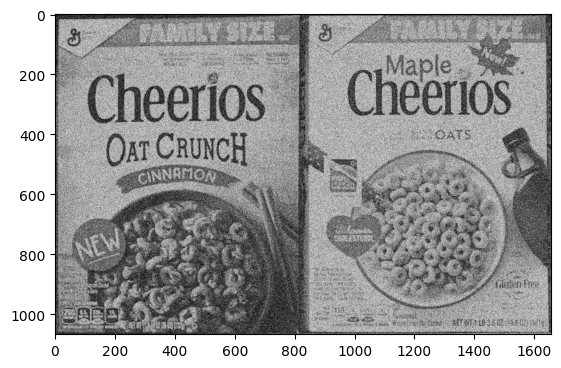

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img_train = cv2.imread('dataset/scenes/scene1.png', 0)
plt.imshow(img_train, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

Query image

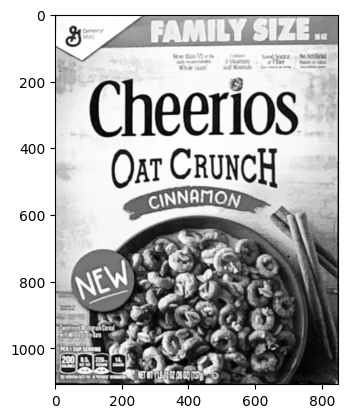

In [ ]:
img_query = cv2.imread('dataset/models/ref1.png', 0)
plt.imshow(img_query, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()


# Detection
Start by finding keypoints in the model


In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()
#Test different

# find the keypoints and descùriptors with SIFT
kp_query = sift.detect(img_query)

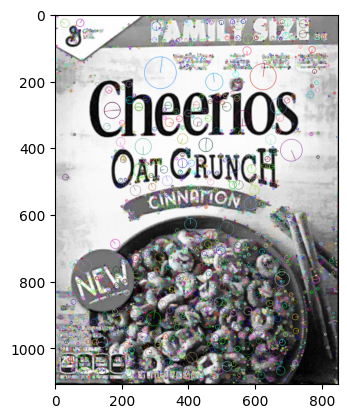

In [ ]:
img_visualization = cv2.drawKeypoints(img_query, kp_query, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_visualization)
plt.show()

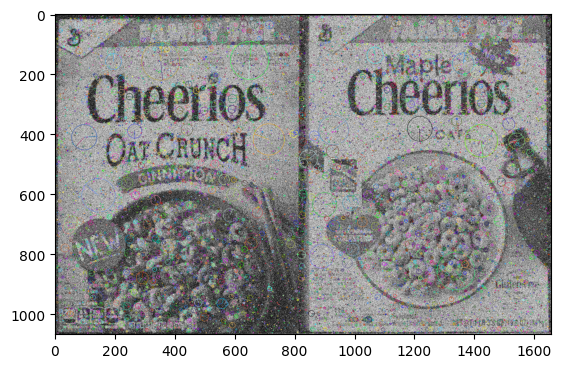

In [ ]:
kp_train = sift.detect(img_train)

img=cv2.drawKeypoints(img_train, kp_train, None, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)
plt.show()

# Keypoint detection
Now using Sift, try others as well.

In [ ]:
# Describing keypoints for query and train images
kp_query, des_query = sift.compute(img_query, kp_query)
kp_train, des_train = sift.compute(img_train, kp_train)

Do it all in one

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Define a function for object detection pipeline
def object_retrieve(img_query, img_train_denoized, min_match_count):

    #Keypoint detection
    sift = cv2.xfeatures2d.SIFT_create()
    kp_query =  sift.detect(img_query)
    kp_train =  sift.detect(img_train_denoized)

    #Keypoint description
    kp_query, des_query =  sift.compute(img_query, kp_query)
    kp_train, des_train = sift.compute(img_train_denoized, kp_train)

    #Feature matching
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des_query,des_train,k=2)
    good = []

    #filtering false matches, use 0.7 because SIFT
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    if len(good)>min_match_count:
      return good, kp_query, kp_train
    else:
      return 0, kp_query, kp_train


mg_query = cv2.imread('bishop.jpg', 0) # queryImage
imgs_train = ['scene1.jpg', 'scene2.jpg', 'scene3.jpg', 'scene4.jpg', 'scene5.jpg']



In [ ]:
def poistion_estimation(good,kp_query,kp_train, img_query, img_train_denoized):
  instances = []
  src_pts = np.float32([ kp_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
  dst_pts = np.float32([ kp_train[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

  # Using RANSAC to estimate a robust homography.

  # It returns the homography M and a mask for the discarded points
  M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

  # Mask of discarded point used in visualization
  matchesMask = mask.ravel().tolist()

  # Corners of the query image
  h,w = img_query.shape
  pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)

  # Projecting the corners into the train image
  dst = cv2.perspectiveTransform(pts,M)

  # Calculate the center of the bounding box
  x_center = (dst[0][0][0] + dst[2][0][0]) // 2
  y_center = (dst[0][0][1] + dst[2][0][1]) // 2

  # Drawing the bounding box
  img_train_p = cv2.polylines(img_train_denoized,[np.int32(dst)],True,255,3, cv2.LINE_AA)
  plt.imshow(img_train_p, 'gray')
  plt.show()
  return h, w, (x_center, y_center)

Product dataset/models/ref1.png in dataset/scenes/scene1.png:True


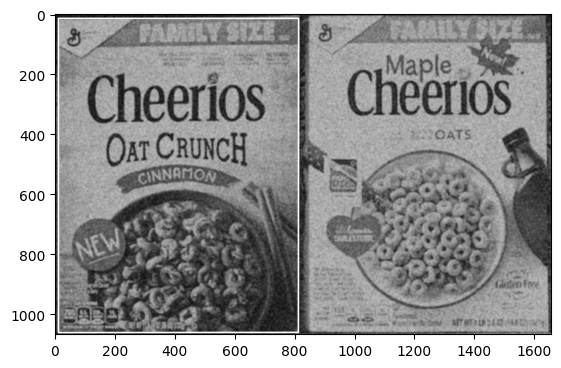

Product 1 - 1 instance
Instance 1 poistion: (411.0, 538.0), width: 1108, height: 848
Product dataset/models/ref1.png in dataset/scenes/scene2.png:True


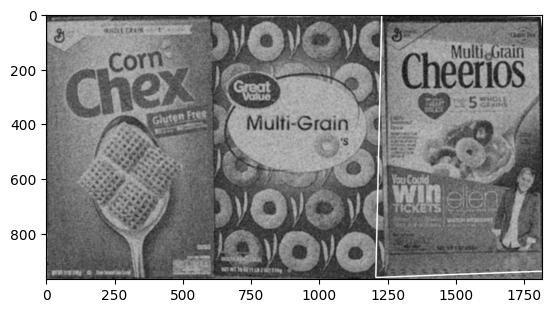

Product 1 - 1 instance
Instance 1 poistion: (1574.0, 464.0), width: 1108, height: 848
Product dataset/models/ref1.png in dataset/scenes/scene3.png:False
Product dataset/models/ref1.png in dataset/scenes/scene4.png:True


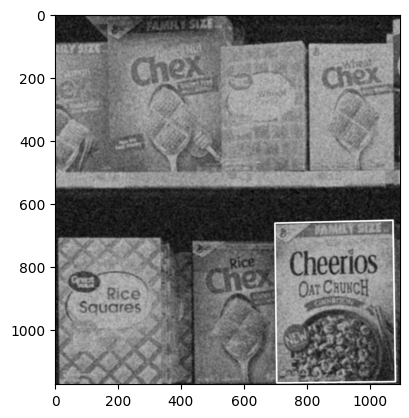

Product 1 - 1 instance
Instance 1 poistion: (887.0, 915.0), width: 1108, height: 848
Product dataset/models/ref1.png in dataset/scenes/scene5.png:False
Product dataset/models/ref2.png in dataset/scenes/scene1.png:True


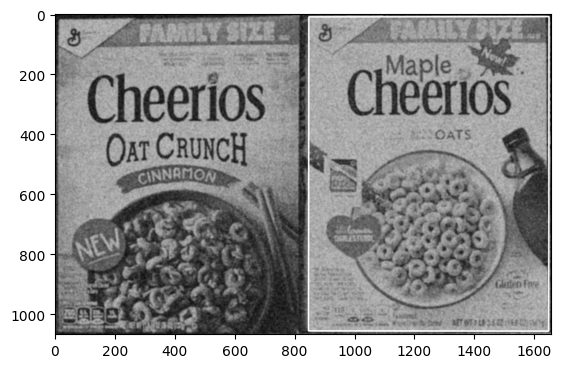

Product 2 - 1 instance
Instance 1 poistion: (1248.0, 533.0), width: 1108, height: 848
Product dataset/models/ref2.png in dataset/scenes/scene2.png:True


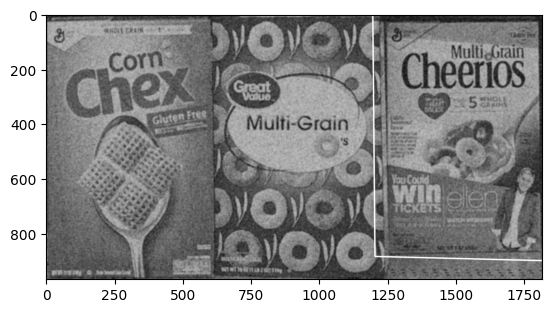

Product 2 - 1 instance
Instance 1 poistion: (1539.0, 448.0), width: 1108, height: 848
Product dataset/models/ref2.png in dataset/scenes/scene3.png:False
Product dataset/models/ref2.png in dataset/scenes/scene4.png:False
Product dataset/models/ref2.png in dataset/scenes/scene5.png:False
Product dataset/models/ref3.png in dataset/scenes/scene1.png:False
Product dataset/models/ref3.png in dataset/scenes/scene2.png:True


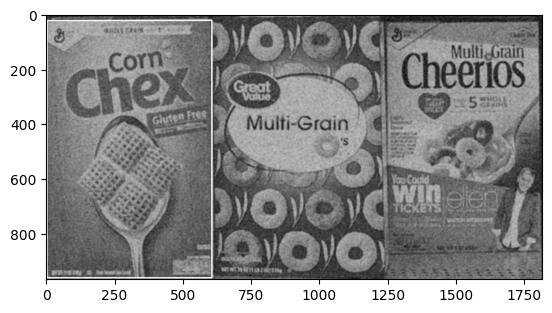

Product 3 - 1 instance
Instance 1 poistion: (305.0, 493.0), width: 1402, height: 900
Product dataset/models/ref3.png in dataset/scenes/scene3.png:False
Product dataset/models/ref3.png in dataset/scenes/scene4.png:False
Product dataset/models/ref3.png in dataset/scenes/scene5.png:False
Product dataset/models/ref4.png in dataset/scenes/scene1.png:False
Product dataset/models/ref4.png in dataset/scenes/scene2.png:True


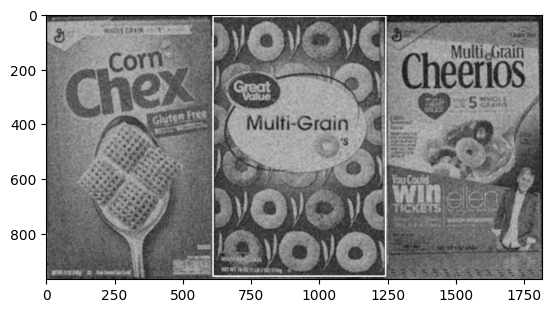

Product 4 - 1 instance
Instance 1 poistion: (927.0, 482.0), width: 1342, height: 894
Product dataset/models/ref4.png in dataset/scenes/scene3.png:False
Product dataset/models/ref4.png in dataset/scenes/scene4.png:False
Product dataset/models/ref4.png in dataset/scenes/scene5.png:False
Product dataset/models/ref5.png in dataset/scenes/scene1.png:True


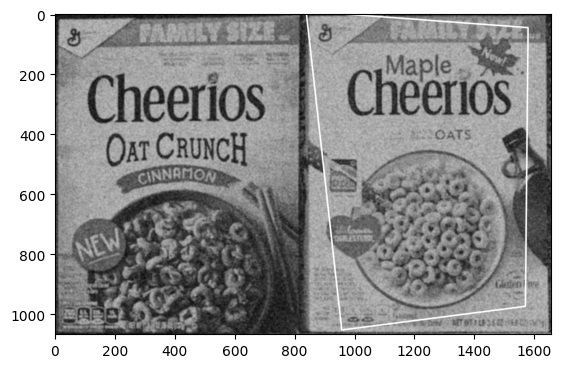

Product 5 - 1 instance
Instance 1 poistion: (1204.0, 482.0), width: 1192, height: 792
Product dataset/models/ref5.png in dataset/scenes/scene2.png:True


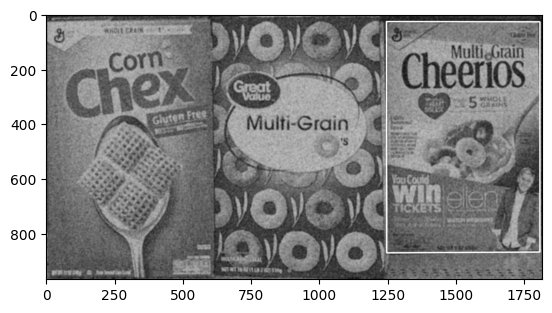

Product 5 - 1 instance
Instance 1 poistion: (1527.0, 448.0), width: 1192, height: 792
Product dataset/models/ref5.png in dataset/scenes/scene3.png:False
Product dataset/models/ref5.png in dataset/scenes/scene4.png:False
Product dataset/models/ref5.png in dataset/scenes/scene5.png:False
Product dataset/models/ref6.png in dataset/scenes/scene1.png:False
Product dataset/models/ref6.png in dataset/scenes/scene2.png:False
Product dataset/models/ref6.png in dataset/scenes/scene3.png:True


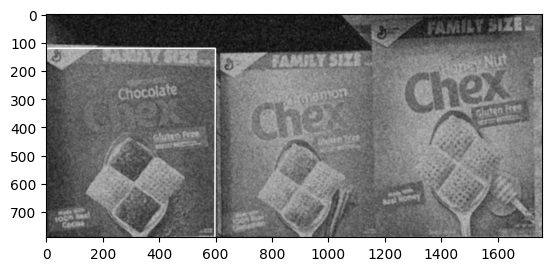

Product 6 - 1 instance
Instance 1 poistion: (297.0, 456.0), width: 1300, height: 1164
Product dataset/models/ref6.png in dataset/scenes/scene4.png:False
Product dataset/models/ref6.png in dataset/scenes/scene5.png:False
Product dataset/models/ref7.png in dataset/scenes/scene1.png:False
Product dataset/models/ref7.png in dataset/scenes/scene2.png:False
Product dataset/models/ref7.png in dataset/scenes/scene3.png:True


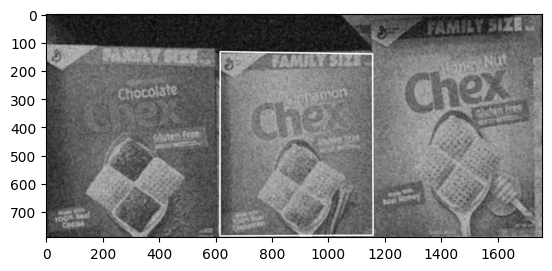

Product 7 - 1 instance
Instance 1 poistion: (888.0, 458.0), width: 870, height: 726
Product dataset/models/ref7.png in dataset/scenes/scene4.png:False
Product dataset/models/ref7.png in dataset/scenes/scene5.png:False
Product dataset/models/ref8.png in dataset/scenes/scene1.png:False
Product dataset/models/ref8.png in dataset/scenes/scene2.png:True


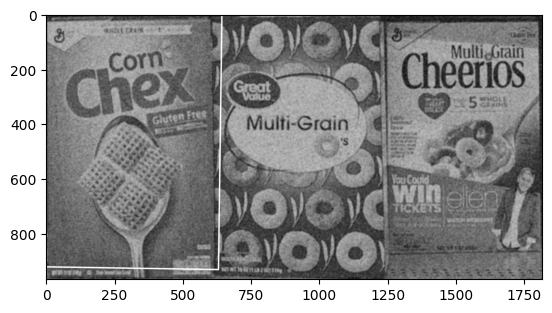

Product 8 - 1 instance
Instance 1 poistion: (289.0, 439.0), width: 1026, height: 736
Product dataset/models/ref8.png in dataset/scenes/scene3.png:True


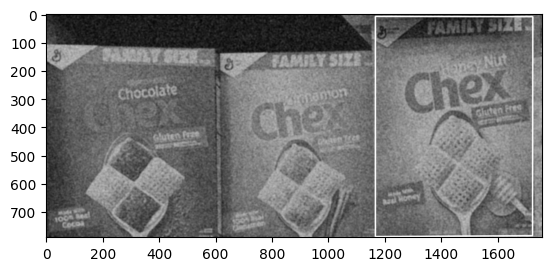

Product 8 - 1 instance
Instance 1 poistion: (1445.0, 397.0), width: 1026, height: 736
Product dataset/models/ref8.png in dataset/scenes/scene4.png:False
Product dataset/models/ref8.png in dataset/scenes/scene5.png:False
Product dataset/models/ref9.png in dataset/scenes/scene1.png:False
Product dataset/models/ref9.png in dataset/scenes/scene2.png:True


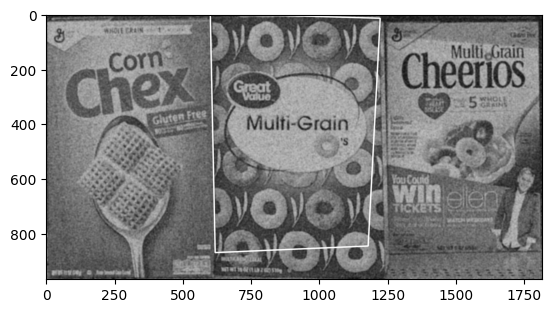

Product 9 - 1 instance
Instance 1 poistion: (890.0, 421.0), width: 992, height: 698
Product dataset/models/ref9.png in dataset/scenes/scene3.png:False
Product dataset/models/ref9.png in dataset/scenes/scene4.png:True


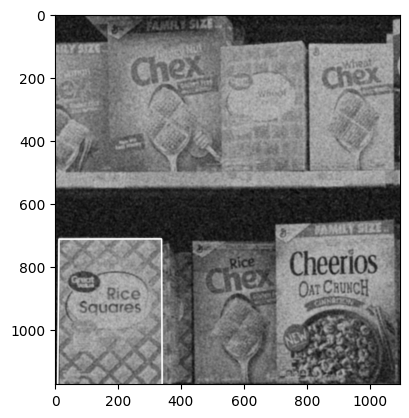

Product 9 - 1 instance
Instance 1 poistion: (176.0, 945.0), width: 992, height: 698
Product dataset/models/ref9.png in dataset/scenes/scene5.png:False
Product dataset/models/ref10.png in dataset/scenes/scene1.png:False
Product dataset/models/ref10.png in dataset/scenes/scene2.png:False
Product dataset/models/ref10.png in dataset/scenes/scene3.png:False
Product dataset/models/ref10.png in dataset/scenes/scene4.png:False
Product dataset/models/ref10.png in dataset/scenes/scene5.png:False
Product dataset/models/ref11.png in dataset/scenes/scene1.png:False
Product dataset/models/ref11.png in dataset/scenes/scene2.png:False
Product dataset/models/ref11.png in dataset/scenes/scene3.png:False
Product dataset/models/ref11.png in dataset/scenes/scene4.png:False
Product dataset/models/ref11.png in dataset/scenes/scene5.png:True


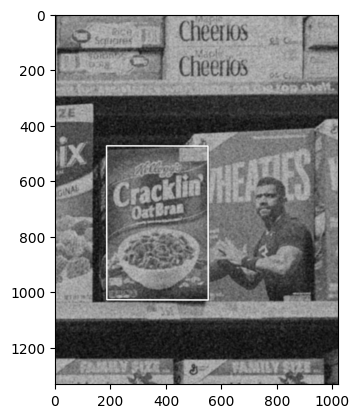

Product 11 - 1 instance
Instance 1 poistion: (368.0, 751.0), width: 902, height: 598
Product dataset/models/ref12.png in dataset/scenes/scene1.png:False
Product dataset/models/ref12.png in dataset/scenes/scene2.png:False
Product dataset/models/ref12.png in dataset/scenes/scene3.png:False
Product dataset/models/ref12.png in dataset/scenes/scene4.png:False
Product dataset/models/ref12.png in dataset/scenes/scene5.png:True


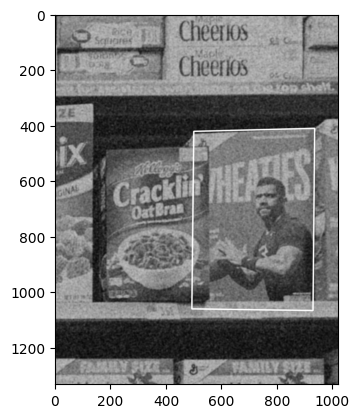

Product 12 - 1 instance
Instance 1 poistion: (714.0, 745.0), width: 1086, height: 730
Product dataset/models/ref13.png in dataset/scenes/scene1.png:False
Product dataset/models/ref13.png in dataset/scenes/scene2.png:False
Product dataset/models/ref13.png in dataset/scenes/scene3.png:False
Product dataset/models/ref13.png in dataset/scenes/scene4.png:False
Product dataset/models/ref13.png in dataset/scenes/scene5.png:False
Product dataset/models/ref14.png in dataset/scenes/scene1.png:True


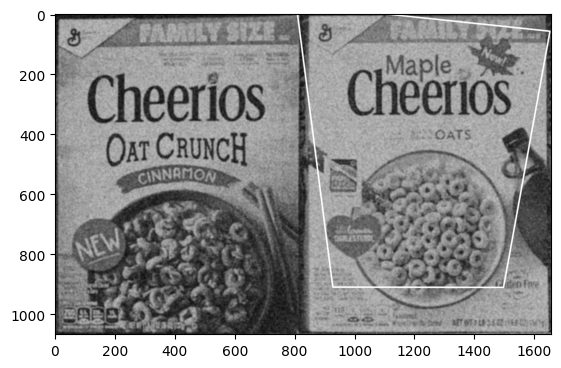

Product 14 - 1 instance
Instance 1 poistion: (1151.0, 440.0), width: 1122, height: 836
Product dataset/models/ref14.png in dataset/scenes/scene2.png:True


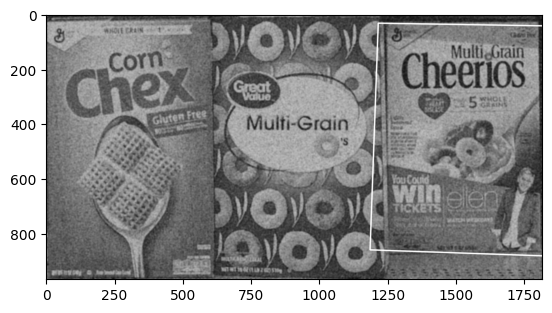

Product 14 - 1 instance
Instance 1 poistion: (1518.0, 458.0), width: 1122, height: 836
Product dataset/models/ref14.png in dataset/scenes/scene3.png:False
Product dataset/models/ref14.png in dataset/scenes/scene4.png:False
Product dataset/models/ref14.png in dataset/scenes/scene5.png:False


In [ ]:
imgs_train = ['dataset/scenes/scene{}.png'.format(i) for i in range(1, 6)]

contain_img = {}
# Iterating among all query images
for i in range(1, 15):
  img_query = cv2.imread('dataset/models/ref{}.png'.format(i), 0)
  # Iterate among scenes and looking for query image
  for path in imgs_train:
      img_train = cv2.imread(path,0)
      img_train_denoized = cv2.bilateralFilter(img_train, 9, 200, 75)

      #can try 60
      found, kp_query, kp_train = object_retrieve(img_query, img_train_denoized, 60)
      print("Product {} in {}:{}".format('dataset/models/ref{}.png'.format(i),path,found != 0))
      if found != 0:
        h, w, pts = poistion_estimation(found, kp_query, kp_train, img_query, img_train_denoized)
        print("Product {} - 1 instance".format(i))
        print("Instance 1 poistion: {}, width: {}, height: {}".format(pts, h, w))
        # Check if key exists in the dictionary
        if path in contain_img:
            # If key exists, append to the list
            contain_img[path].append('dataset/models/ref{}.png'.format(i))
        else:
            # If key doesn't exist, create a new list with the value
            contain_img[path] = ['dataset/models/ref{}.png'.format(i)]




In [ ]:
#Add diffusion step (denosing)

In [ ]:
print(contain_img)

for key in contain_img:
  #Sjekk schene 4!!
  print(key)
  print(contain_img[key])

{'dataset/scenes/scene1.png': ['dataset/models/ref1.png', 'dataset/models/ref2.png', 'dataset/models/ref5.png', 'dataset/models/ref14.png'], 'dataset/scenes/scene2.png': ['dataset/models/ref1.png', 'dataset/models/ref2.png', 'dataset/models/ref3.png', 'dataset/models/ref4.png', 'dataset/models/ref5.png', 'dataset/models/ref8.png', 'dataset/models/ref9.png', 'dataset/models/ref14.png'], 'dataset/scenes/scene4.png': ['dataset/models/ref1.png', 'dataset/models/ref9.png'], 'dataset/scenes/scene3.png': ['dataset/models/ref6.png', 'dataset/models/ref7.png', 'dataset/models/ref8.png'], 'dataset/scenes/scene5.png': ['dataset/models/ref11.png', 'dataset/models/ref12.png']}
dataset/scenes/scene1.png
['dataset/models/ref1.png', 'dataset/models/ref2.png', 'dataset/models/ref5.png', 'dataset/models/ref14.png']
dataset/scenes/scene2.png
['dataset/models/ref1.png', 'dataset/models/ref2.png', 'dataset/models/ref3.png', 'dataset/models/ref4.png', 'dataset/models/ref5.png', 'dataset/models/ref8.png', 'd